In [1]:
import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
%load_ext autoreload
%autoreload 2

In [2]:
from tabGAN import TabGAN
from src import constants as const
import helpers
from v2_hp_tuning import fetch_hp_info

imports_path = "src//imports.ipynb"
tabGAN_path = "tabGAN.py"
utils_path = "utils\\utils.ipynb"
import helpers.hp_tuning

%run "$imports_path"

In [3]:
if const.dir.project() != os.getcwd():
    raise ValueError("Project directory not the same as in consts")

In [4]:
dataset_train_path = os.path.join(const.dir.data(), "df_adult_edited_train.csv")
dataset_test_path = os.path.join(const.dir.data(), "df_adult_edited_test.csv")

data_train = pd.read_csv(dataset_train_path)
data_test = pd.read_csv(dataset_test_path)
discrete_columns = data_train.columns[data_train.dtypes == "object"]

METHOD_NAME = "ctabGAN-qtr"

In [5]:
def plot_hp_tuning(hp_name, allow_not_complete_hp_vec=True, n_synthetic_datasets=None, **kwargs):
    hp_info = fetch_hp_info(method=METHOD_NAME, version=5)
    curr_image_dir = os.path.join(const.dir.images_hp_v5(), METHOD_NAME)
    curr_hp_info = hp_info[hp_name]
    if n_synthetic_datasets is None:
        n_synthetic_datasets = curr_hp_info["n_synthetic_datasets"]
    result = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
        data_train=data_train, 
        data_test=data_test,
        dataset_dir=const.dir.hp_tuning_v5(),
        hyperparams_vec=curr_hp_info["vec"],
        hyperparams_name = hp_name,
        hyperparams_subname = curr_hp_info["hyperparams_subname"],
        subfolder=METHOD_NAME,
        n_synthetic_datasets = n_synthetic_datasets,
        save_dir = const.dir.images_hp_v5(),
        save_path = f"predictive_performance_against_{hp_name}.svg",
        incl_comparison_folder=True,
        allow_not_complete_hp_vec=allow_not_complete_hp_vec,
        **kwargs
    )
    return result

  0%|          | 0/210 [00:00<?, ?it/s]

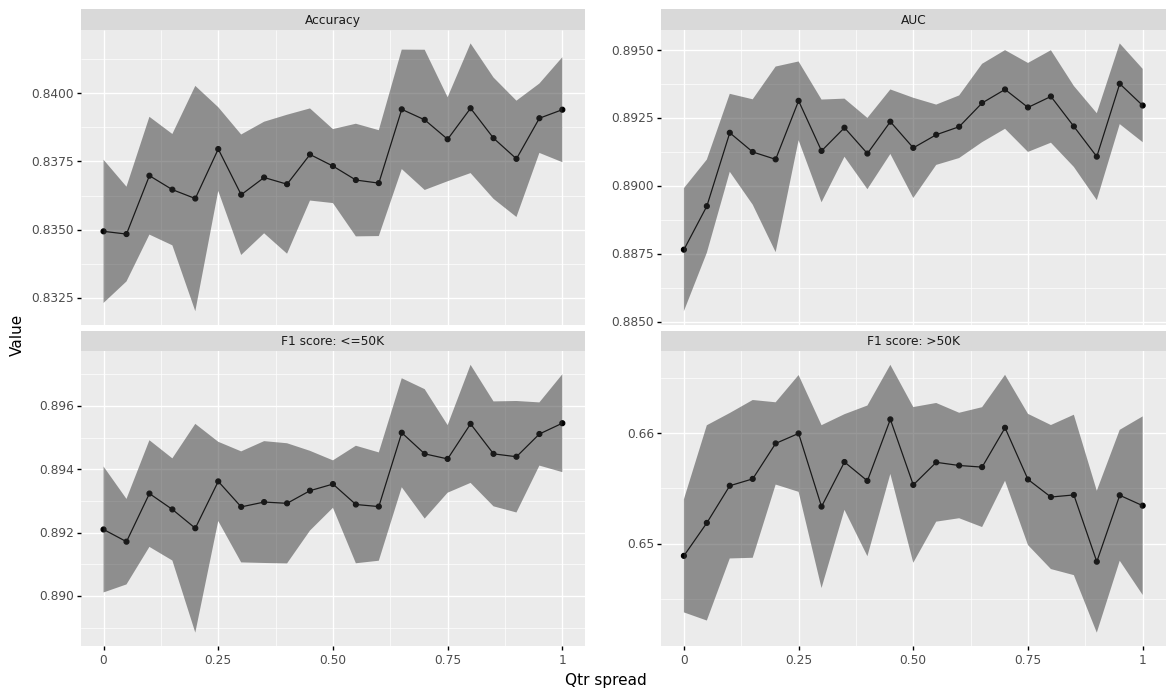

In [17]:
result_qtr_spread = plot_hp_tuning("qtr_spread", n_synthetic_datasets=10)

In [18]:
result_qtr_spread

,Qtr spread,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00,0.834940,0.887653,0.770497,0.892102,0.648892,0.002622,0.002266,0.003120,0.001990,0.005123
1,0.05,0.834841,0.889255,0.771796,0.891716,0.651876,0.001735,0.001715,0.004368,0.001351,0.008845
2,0.10,0.836979,0.891957,0.774239,0.893236,0.655242,0.002157,0.001435,0.003462,0.001685,0.006587
3,0.15,0.836467,0.891250,0.774299,0.892735,0.655862,0.002039,0.001940,0.003665,0.001614,0.007147
4,0.20,0.836142,0.890979,0.775608,0.892141,0.659075,0.004126,0.003417,0.003316,0.003298,0.003727
5,0.25,0.837955,0.893134,0.776800,0.893621,0.659980,0.001533,0.001449,0.002673,0.001252,0.005289
6,0.30,0.836282,0.891290,0.773084,0.892815,0.653352,0.002206,0.001891,0.003771,0.001754,0.007376
7,0.35,0.836912,0.892144,0.775179,0.892968,0.657391,0.002043,0.001071,0.001888,0.001925,0.004332
8,0.40,0.836667,0.891193,0.774306,0.892928,0.655684,0.002545,0.001312,0.003805,0.001898,0.006824
9,0.45,0.837756,0.892366,0.777290,0.893327,0.661254,0.001687,0.001188,0.002699,0.001259,0.004941


  0%|          | 0/50 [00:00<?, ?it/s]

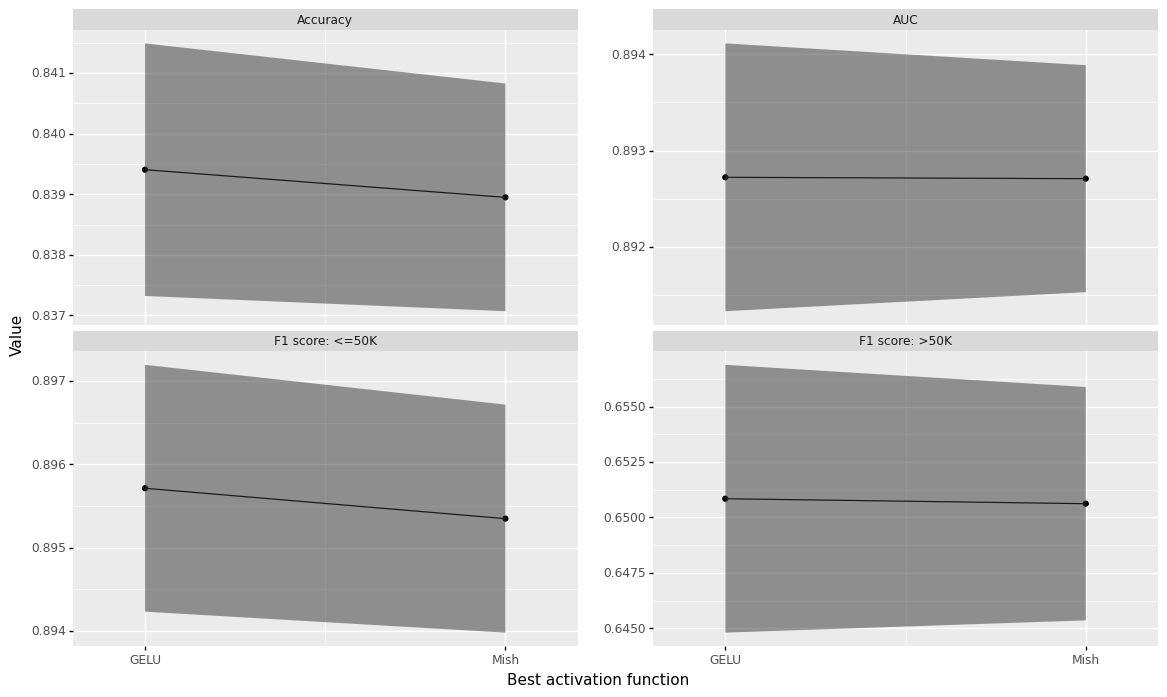

In [8]:
result_best_activation_function = plot_hp_tuning("best_activation_function")

In [9]:
result_best_activation_function

,Best activation function,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,GELU,0.839405,0.892721,0.773279,0.895713,0.650845,0.002084,0.001393,0.003367,0.001481,0.006037
1,Mish,0.838948,0.892707,0.772985,0.895349,0.650622,0.001878,0.001180,0.002924,0.001368,0.005261


  0%|          | 0/250 [00:00<?, ?it/s]

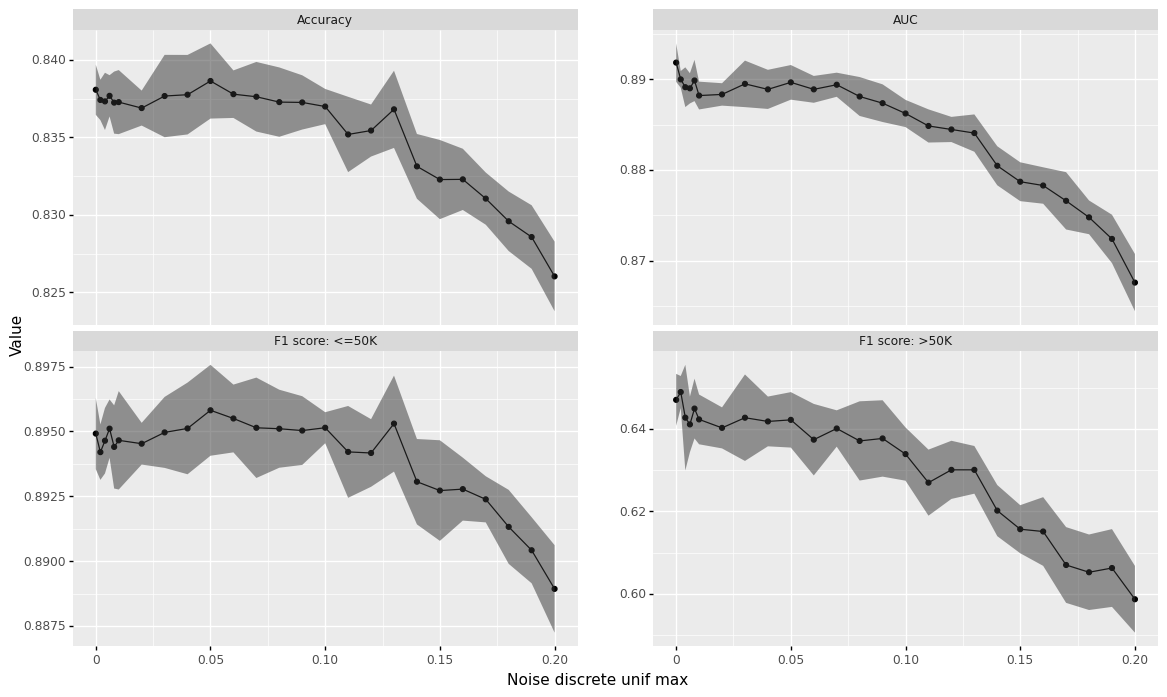

In [10]:
result_noise_discrete_unif_max = plot_hp_tuning("noise_discrete_unif_max")

  0%|          | 0/230 [00:00<?, ?it/s]

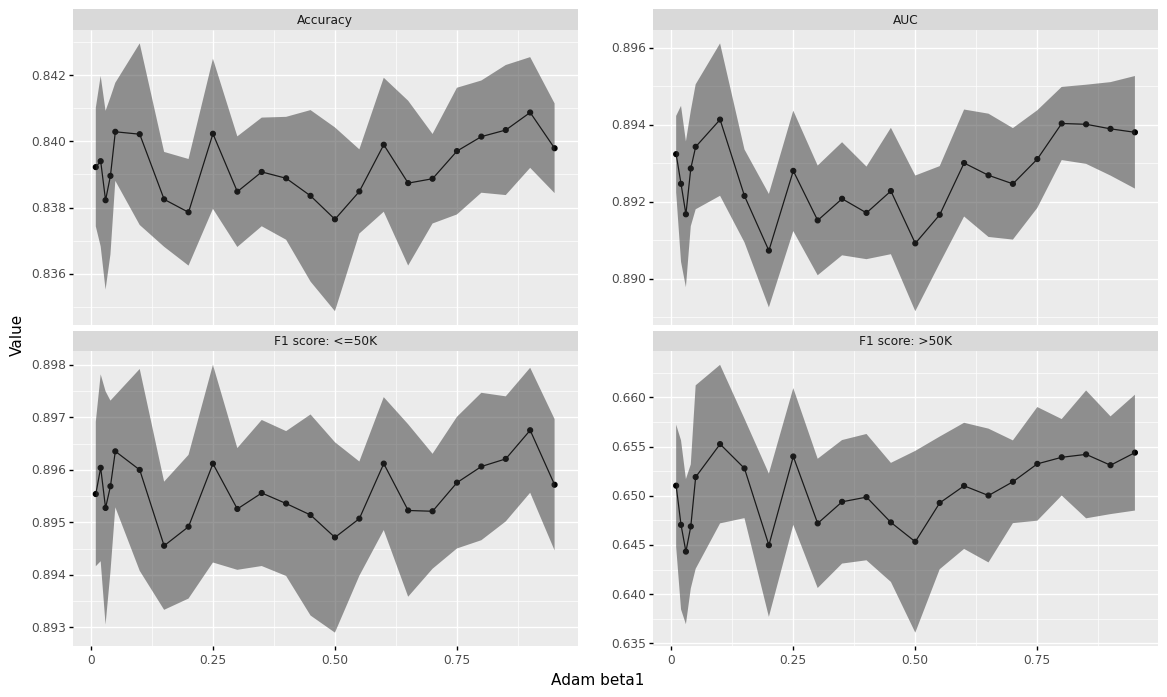

In [11]:
result_adam_beta1 = plot_hp_tuning("adam_beta1")

In [12]:
result_adam_beta1

,Adam beta1,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.01,0.839223,0.893237,0.773283,0.895540,0.651025,0.001795,0.000993,0.003221,0.001376,0.006201
1,0.02,0.839402,0.892465,0.771541,0.896040,0.647043,0.002580,0.002027,0.004699,0.001779,0.008583
2,0.03,0.838220,0.891674,0.769802,0.895275,0.644328,0.002706,0.001895,0.003766,0.002222,0.007370
3,0.04,0.838958,0.892865,0.771286,0.895688,0.646884,0.002379,0.001499,0.003679,0.001631,0.006298
4,0.05,0.840292,0.893428,0.774126,0.896354,0.651898,0.001485,0.001624,0.004619,0.001066,0.009315
5,0.10,0.840219,0.894135,0.775622,0.896000,0.655245,0.002749,0.001980,0.004515,0.001922,0.008049
6,0.15,0.838247,0.892152,0.773667,0.894555,0.652778,0.001436,0.001207,0.002479,0.001221,0.005049
7,0.20,0.837855,0.890730,0.769948,0.894918,0.644978,0.001614,0.001474,0.003528,0.001369,0.007273
8,0.25,0.840232,0.892803,0.775053,0.896118,0.653987,0.002271,0.001565,0.003509,0.001882,0.006942
9,0.30,0.838479,0.891515,0.771225,0.895256,0.647194,0.001674,0.001425,0.003464,0.001159,0.006561


  0%|          | 0/190 [00:00<?, ?it/s]

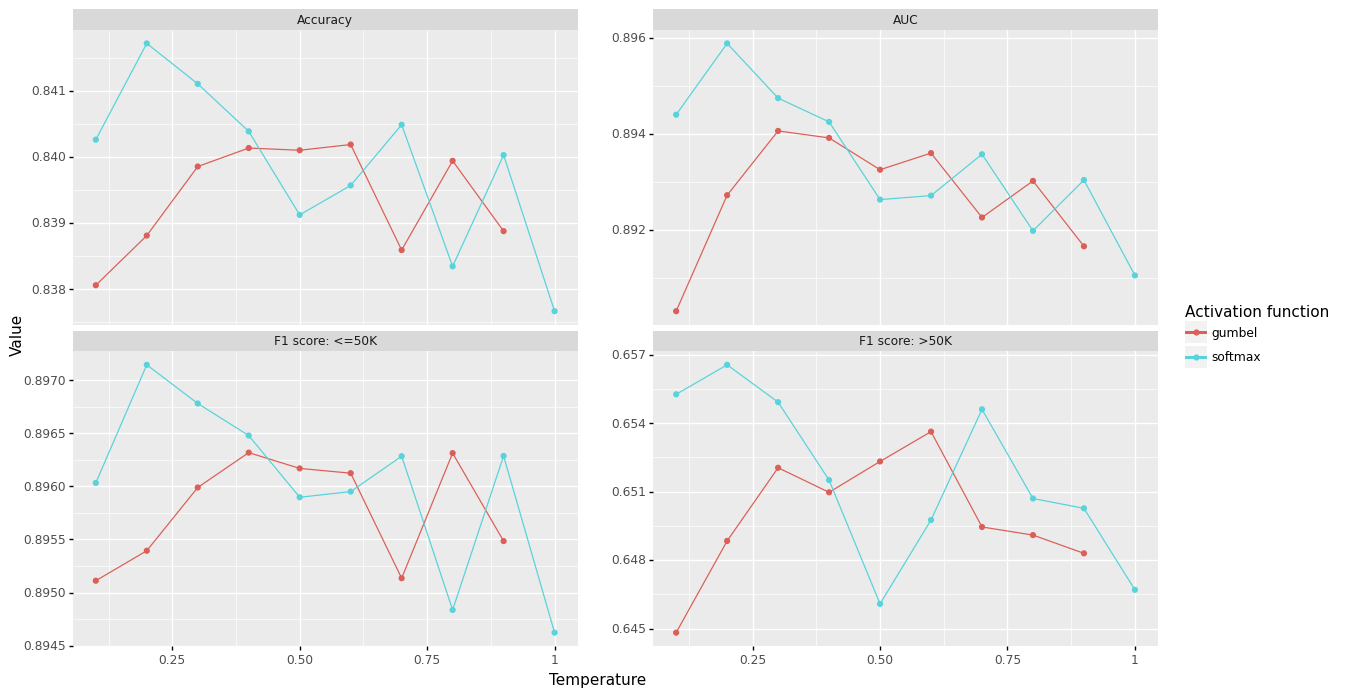

In [13]:
result_oh_encoding = plot_hp_tuning("oh_encoding")

In [14]:
result_oh_encoding

,Temperature,Activation function,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.1,gumbel,0.838061,0.890312,0.769966,0.895111,0.644820,0.001648,0.001565,0.004113,0.001000,0.007846
1,0.1,softmax,0.840259,0.894397,0.775649,0.896033,0.655265,0.002089,0.001529,0.002969,0.001661,0.005575
2,0.2,gumbel,0.838811,0.892723,0.772116,0.895394,0.648839,0.001476,0.001164,0.002418,0.001098,0.004487
3,0.2,softmax,0.841713,0.895879,0.776852,0.897145,0.656558,0.001793,0.001167,0.003103,0.001420,0.006072
4,0.3,gumbel,0.839854,0.894060,0.774018,0.895990,0.652047,0.000819,0.001104,0.001653,0.000593,0.003175
5,0.3,softmax,0.841102,0.894741,0.775851,0.896781,0.654922,0.002277,0.001901,0.005095,0.001161,0.009151
6,0.4,gumbel,0.840133,0.893914,0.773644,0.896318,0.650970,0.001090,0.001072,0.002415,0.000739,0.004610
7,0.4,softmax,0.840385,0.894248,0.773993,0.896479,0.651507,0.001704,0.000915,0.002755,0.001321,0.005238
8,0.5,gumbel,0.840100,0.893253,0.774246,0.896169,0.652322,0.002344,0.001583,0.003693,0.001583,0.006310
9,0.5,softmax,0.839124,0.892632,0.770989,0.895898,0.646080,0.002325,0.001615,0.003327,0.001635,0.005607


  0%|          | 0/30 [00:00<?, ?it/s]

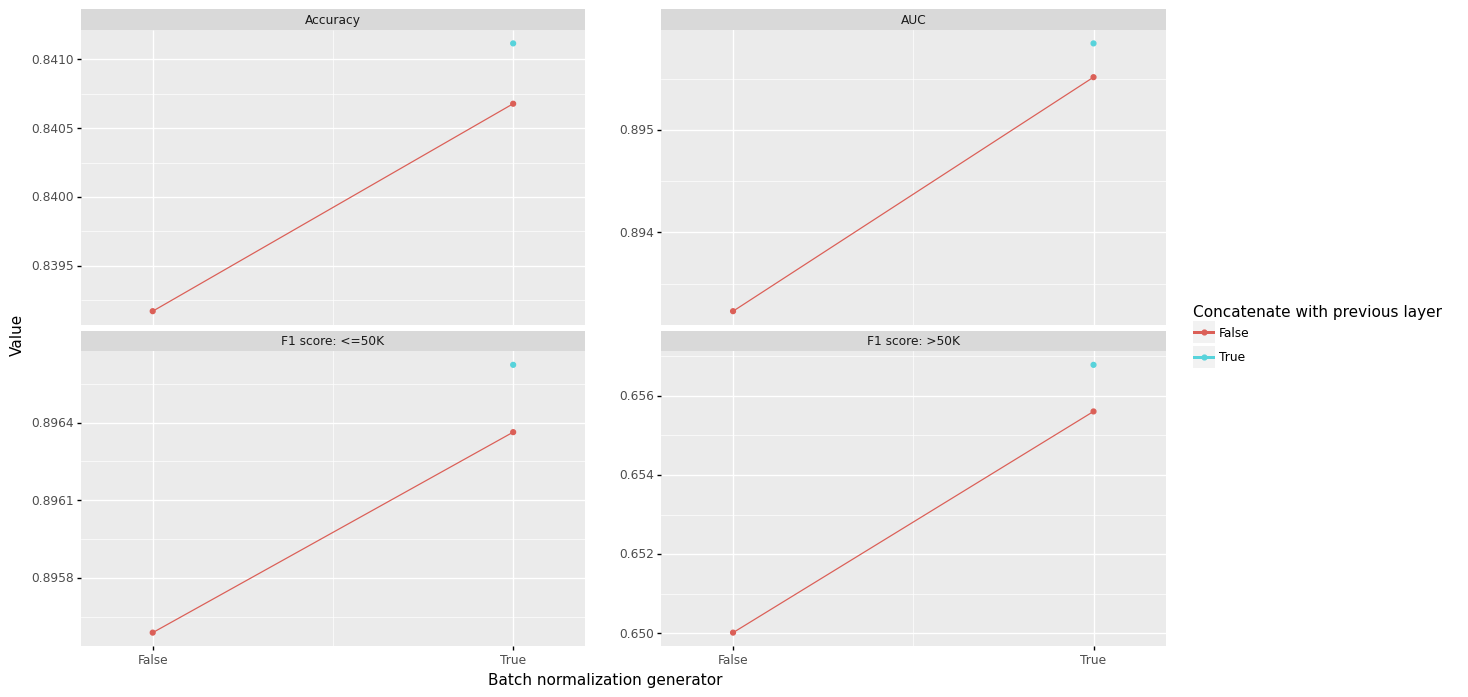

In [15]:
result_BN = plot_hp_tuning("BN")

In [16]:
result_BN

,Batch normalization generator,Concatenate with previous layer,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,False,False,0.839170,0.893231,0.772802,0.895589,0.650015,0.001962,0.001858,0.003299,0.001385,0.005962
1,True,False,0.840677,0.895515,0.775984,0.896363,0.655606,0.002437,0.001861,0.003257,0.001721,0.005270
2,True,True,0.841116,0.895845,0.776704,0.896623,0.656784,0.001761,0.000948,0.002696,0.001368,0.005091
